# Day 1

## An object-oriented perceptron API

In [1]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = np.zeros(X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

# Day 2

## Training a perceptron model on the Iris dataset

### Import the data

In [2]:
import os
import pandas as pd

s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"''
print('From URL:',s)
df = pd.read_csv(s, header=None, encoding='utf-8')

print(df.tail(60))
print(df.head(60))


From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
       0    1    2    3                4
90   5.5  2.6  4.4  1.2  Iris-versicolor
91   6.1  3.0  4.6  1.4  Iris-versicolor
92   5.8  2.6  4.0  1.2  Iris-versicolor
93   5.0  2.3  3.3  1.0  Iris-versicolor
94   5.6  2.7  4.2  1.3  Iris-versicolor
95   5.7  3.0  4.2  1.2  Iris-versicolor
96   5.7  2.9  4.2  1.3  Iris-versicolor
97   6.2  2.9  4.3  1.3  Iris-versicolor
98   5.1  2.5  3.0  1.1  Iris-versicolor
99   5.7  2.8  4.1  1.3  Iris-versicolor
100  6.3  3.3  6.0  2.5   Iris-virginica
101  5.8  2.7  5.1  1.9   Iris-virginica
102  7.1  3.0  5.9  2.1   Iris-virginica
103  6.3  2.9  5.6  1.8   Iris-virginica
104  6.5  3.0  5.8  2.2   Iris-virginica
105  7.6  3.0  6.6  2.1   Iris-virginica
106  4.9  2.5  4.5  1.7   Iris-virginica
107  7.3  2.9  6.3  1.8   Iris-virginica
108  6.7  2.5  5.8  1.8   Iris-virginica
109  7.2  3.6  6.1  2.5   Iris-virginica
110  6.5  3.2  5.1  2.0   Iris-virginica
111  6.4  2.7  

### Plotting the Iris dataset

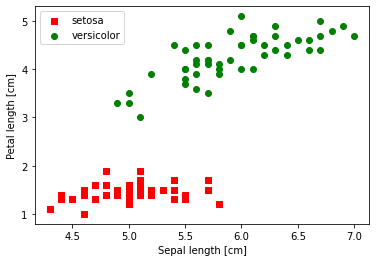

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# we want to select setosa and versicolor in the target
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# only using sepal length and petal length features
X = df.iloc[0:100,[0,2]].values

# plotting data

plt.scatter(X[:50,0], X[:50,1], color='red', marker='s', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='green', marker='o', label='versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

### Training the perceptron model

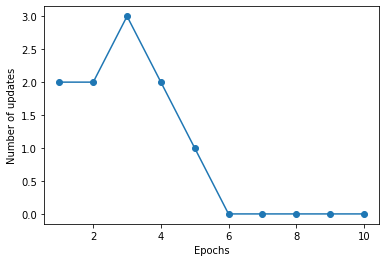

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()


### Function for plotting decision region

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    
    # setting up marker generator and color map
    markers = ('o','s','^','v','<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plotting the decision surface
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    
    
    

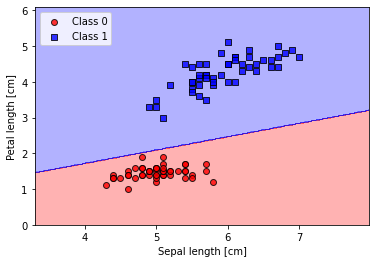

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')



plt.show()

In [7]:
! wget -O data.txt -nc --no-check-certificate  https://archive.ics.uci.edu/ml/machine-learning-databases/00199/MiniBooNE_PID.txt

File ‘data.txt’ already there; not retrieving.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv('data.txt',sep = ' ',header = None, skiprows=1, skipinitialspace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [10]:
# feature scaling

f = open("data.txt",'r')
line = f.readline()
f.close()
l = line.split()
Y = int(l[0])*[1] + int(l[1])*[0]
y = np.array(Y)
X = np.array(df)
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

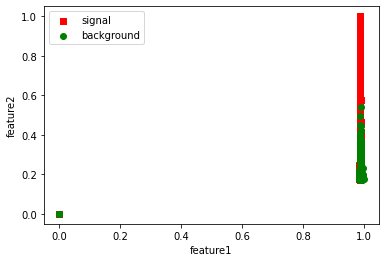

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = y[0:80000]

# only using first two features
X = X[0:80000,[0,2]]

# plotting data

plt.scatter(X[:36499,0], X[:36499,1], color='red', marker='s', label='signal')
plt.scatter(X[36499:80000,0], X[36499:80000,1], color='green', marker='o', label='background')

plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(loc='upper left')

plt.show()

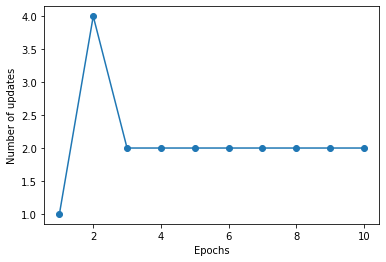

In [12]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()


In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    
    # setting up marker generator and color map
    markers = ('o','s','^','v','<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plotting the decision surface
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    

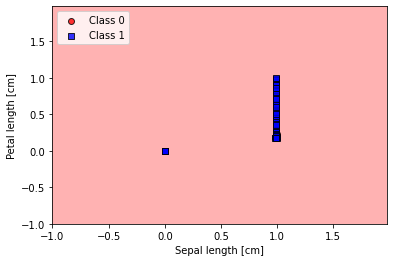

In [14]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')



plt.show()